## AULA 5: REGRESSÃO LOGÍSTICA

1) Importação e preparação dos dados:

In [1]:
#Importando os dados do github:

import pandas as pd 
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

dados['smoker'] = dados['smoker'].map({'yes':1, 'no':0})
dados['charges'] = dados['charges']/1000
dados = dados[['bmi','smoker','charges']]
dados.head()

x=dados[['bmi','charges']]
y=dados['smoker']

Agora, a variável resposta (y) é fumante e as variáveis de entrada (x) são custos médicos e IMC. Neste caso, optou-se por analisar a variável fumante pois é sabido, conforme estudos anteriores com outros modelos, que ser fumante tem um acréscimo no custo do plano de saúde. 
Neste momento, optou-se por inverter as variáveis, de modo a se analisar a variável "fumante". É possível que alguém que seja fumante diga que não é para que o plano de saúde seja mais barato. Assim, quer se avaliar a variável resposta pelas medidas de acurácia,sensibilidade e precisão.



2) Validação cruzada K-Fold:

In [2]:
# Configurando a validação cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

validacao = KFold(n_splits = 10, shuffle = True)

# 3) Análise por Regressão Logística:

In [3]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
reglog=cross_validate(modelo, x, y, cv=validacao, scoring = 'accuracy')
reglog

{'fit_time': array([0.05350304, 0.03133845, 0.01716733, 0.0186646 , 0.0354147 ,
        0.0154376 , 0.01604509, 0.04510474, 0.02544355, 0.02097106]),
 'score_time': array([0.00263906, 0.01847053, 0.00207758, 0.00221014, 0.00277805,
        0.00208187, 0.00218797, 0.00680423, 0.00231361, 0.00219154]),
 'test_score': array([0.96268657, 0.90298507, 0.94029851, 0.91791045, 0.91791045,
        0.94029851, 0.94029851, 0.91044776, 0.96240602, 0.91729323])}

Os valores de acurácia obtidos foram superiores a 0,90 (conforme os valores do test_score).

In [4]:
reglog['test_score']

array([0.96268657, 0.90298507, 0.94029851, 0.91791045, 0.91791045,
       0.94029851, 0.94029851, 0.91044776, 0.96240602, 0.91729323])

A média da taxa de acerto (acurácia) para este experimento foi de 0,93:

In [5]:
reglog['test_score'].mean()

0.9312535069015823

Calculando as métricas de acurácia, sensibilidade e precisão:

In [6]:
reglog=cross_validate(modelo, x, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(reglog['test_accuracy'].mean(),4))
print('Sensibilidade:', round(reglog['test_recall'].mean(),4))
print('Precisão:', round(reglog['test_precision'].mean(),4))


Acurácia: 0.9328
Sensibilidade: 0.8014
Precisão: 0.8659


A taxa de acerto do modelo é de 80 %, ou seja, de cada 10 pessoas que dizem que são fumantes, apenas 8 são.
Quanto à precisão, sempre que o modelo diz que é fumante, o modelo acerta em 86 % dos casos.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


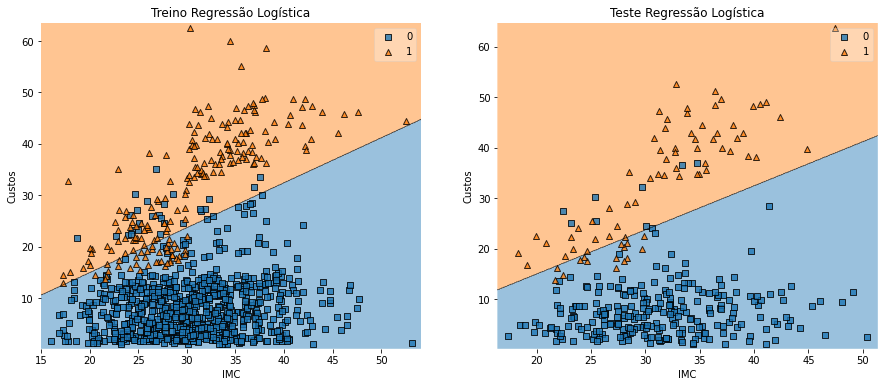

In [9]:
#Plotando os gráficos da região de decisão:

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size=0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plot_decision_regions(xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino Regressão Logística')

plt.subplot(1, 2, 2)
plot_decision_regions(xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste Regressão Logística')

plt.show()

O objetivo é separas as duas classes, a região dos pontos azuis dos pontos laranjas. A região azul correponde aos não fumantes e a região laranja, como os fumantes.

Comparando os parâmetros de acurácia, sensibilidade e precisão do método da Regressão Logística com os métodos: KNN e Árvore de Decisão.

#4) KNN:

4.1) K=7:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k=7
modelo=KNeighborsClassifier(n_neighbors = k)
knn = cross_validate(modelo, x, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(knn['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(knn['test_recall'].mean(), 4))
print('Precisão:', round(knn['test_precision'].mean(), 4))

Acurácia: 0.9559
Sensibilidade: 0.941
Precisão: 0.8555


Analisando a região de decisão do método KNN:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


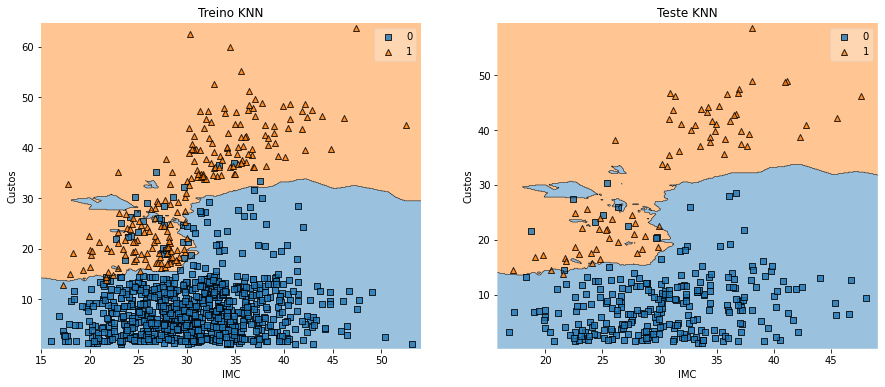

In [13]:
xtreino, xteste, ytreino, yteste = train_test_split (x, y, test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino KNN')


plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste KNN')

plt.show()

Analisando os valores de acurácia, sensibilidade e precisão, nota-se que estes valores foram melhores para o modelo KNN do que pelo modelo de Regressão Logística. Analisando as regiões de decisão, o modelo KNN também se mostrou melhor, justamente por não ser uma reta que separa as regiões.

#Realizando-se os cálculos para K=3, 10 e 15:

4.2) K=3:

In [28]:
from sklearn.neighbors import KNeighborsClassifier

k=3
modelo=KNeighborsClassifier(n_neighbors = k)
knn = cross_validate(modelo, x, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(knn['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(knn['test_recall'].mean(), 4))
print('Precisão:', round(knn['test_precision'].mean(), 4))

Acurácia: 0.9566
Sensibilidade: 0.9207
Precisão: 0.8727


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


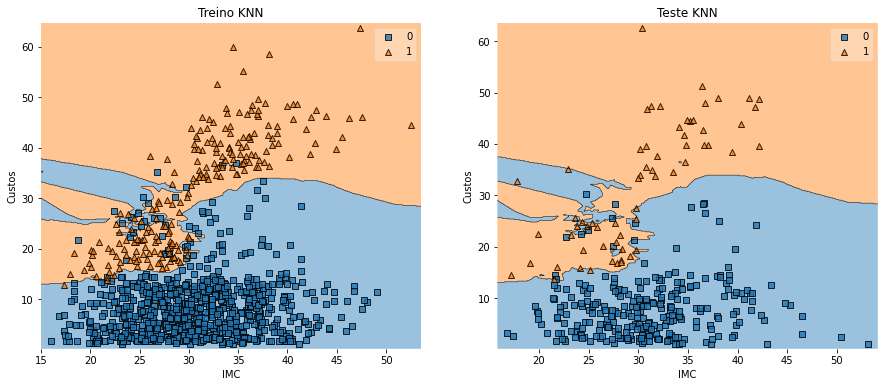

In [29]:
xtreino, xteste, ytreino, yteste = train_test_split (x, y, test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino KNN')


plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste KNN')

plt.show()

4.3) K=10:

In [30]:
from sklearn.neighbors import KNeighborsClassifier

k=10
modelo=KNeighborsClassifier(n_neighbors = k)
knn = cross_validate(modelo, x, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(knn['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(knn['test_recall'].mean(), 4))
print('Precisão:', round(knn['test_precision'].mean(), 4))

Acurácia: 0.9544
Sensibilidade: 0.9263
Precisão: 0.8646


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


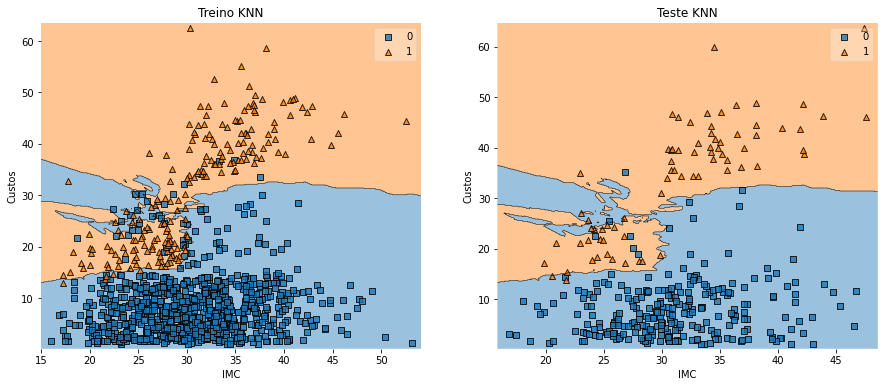

In [31]:
xtreino, xteste, ytreino, yteste = train_test_split (x, y, test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino KNN')


plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste KNN')

plt.show()

4.4) K=15

In [32]:
from sklearn.neighbors import KNeighborsClassifier

k=15
modelo=KNeighborsClassifier(n_neighbors = k)
knn = cross_validate(modelo, x, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(knn['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(knn['test_recall'].mean(), 4))
print('Precisão:', round(knn['test_precision'].mean(), 4))

Acurácia: 0.9604
Sensibilidade: 0.9723
Precisão: 0.8533


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


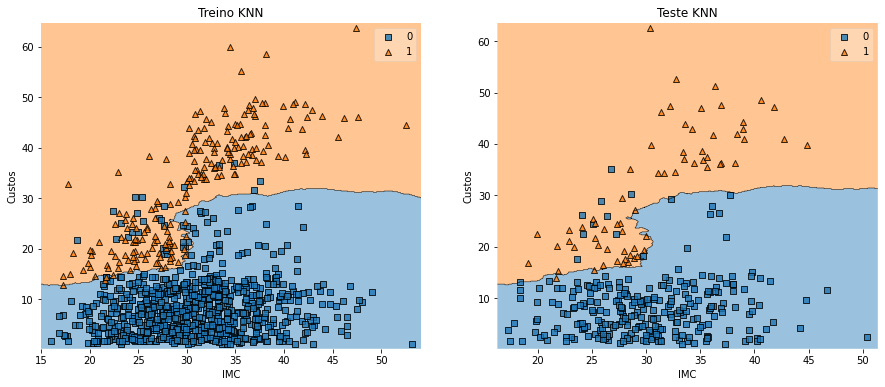

In [33]:
xtreino, xteste, ytreino, yteste = train_test_split (x, y, test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino KNN')


plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste KNN')

plt.show()

Os valores de acurácia foram similares para os diferentes valores de K. Já a sensibilidade, foi melhor quando K=15, o que é plausível, pois há maior quantidade de vizinhos e, portanto, há maior quantidade de interações. Analisando-se a região de decisão, quando K=15 também houve uma separação de fumantes e não fumantes de forma mais satisfatória quando comparado a K com valores menores.

#5) Árvore de Decisão:

Para o modelo de Árvore de Decisão, optou-se por se realizar os cálculos com profundidade (h) igual a 1, 2, 3, 4 e 5.

5.1) h = 3

In [15]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 3
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split=amostra_minima)
arvore = cross_validate(modelo, x, y, cv=validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('Precisão:', round(arvore['test_precision'].mean(), 4))

Acurácia: 0.9619
Sensibilidade: 0.9514
Precisão: 0.8707


Os valores obtidos das 3 métricas foram similares ao modelo KNN, quando K=7.

Analisando a Região de Decisão:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


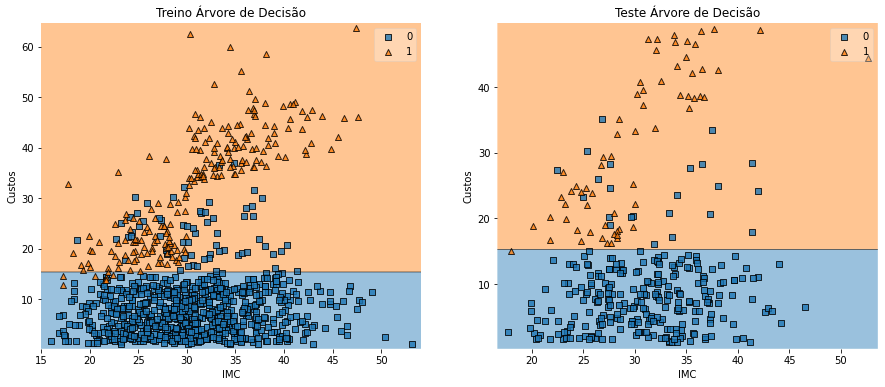

In [43]:
xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino Árvore de Decisão')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste Árvore de Decisão')

plt.show()

Plot da Árvore:

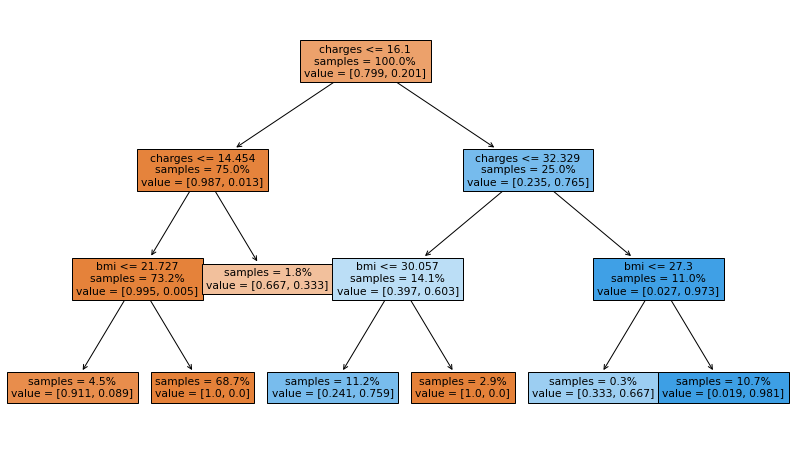

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(14,8))
plot_tree(modelo, filled = True, proportion = True, impurity = False, feature_names=x.columns)
plt.show()

5.2) h = 2

In [41]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 2
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split=amostra_minima)
arvore = cross_validate(modelo, x, y, cv=validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('Precisão:', round(arvore['test_precision'].mean(), 4))

Acurácia: 0.9267
Sensibilidade: 0.9604
Precisão: 0.758


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


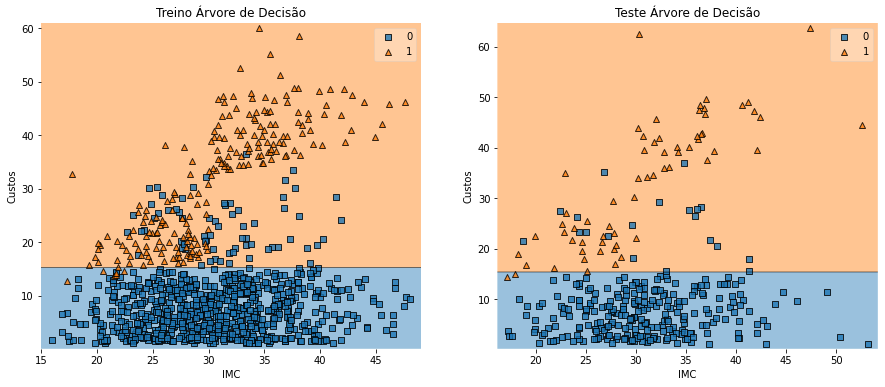

In [44]:
xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino Árvore de Decisão')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste Árvore de Decisão')

plt.show()

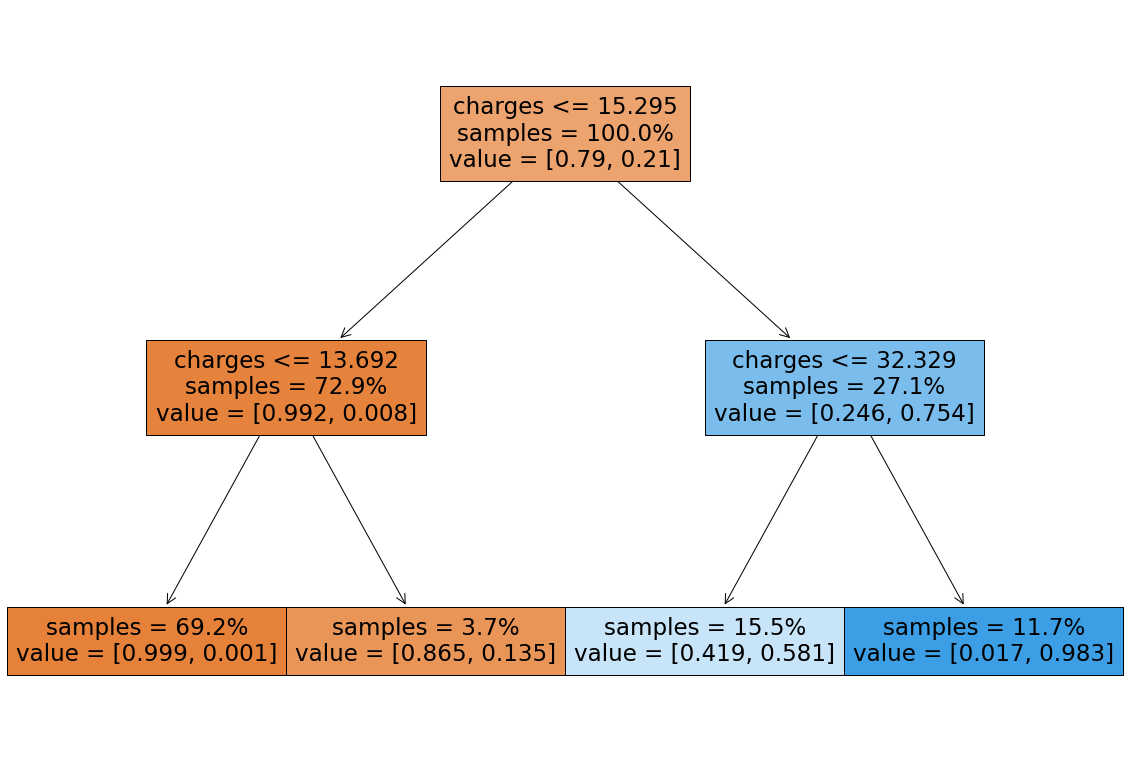

In [45]:
#Plotando a árvore:

from sklearn.tree import plot_tree

plt.figure(figsize=(20,14))
plot_tree(modelo, filled = True, proportion = True, impurity = False, feature_names=x.columns)
plt.show()

5.3) h = 1





In [46]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 1
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split=amostra_minima)
arvore = cross_validate(modelo, x, y, cv=validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('Precisão:', round(arvore['test_precision'].mean(), 4))

Acurácia: 0.9267
Sensibilidade: 0.9643
Precisão: 0.7533


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


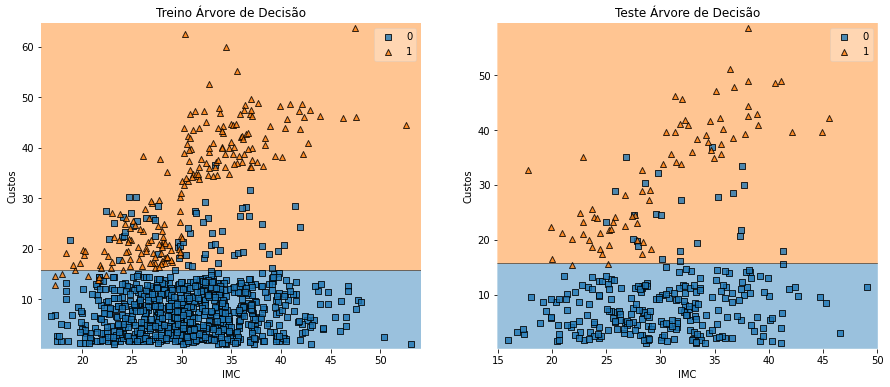

In [47]:
xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino Árvore de Decisão')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste Árvore de Decisão')

plt.show()

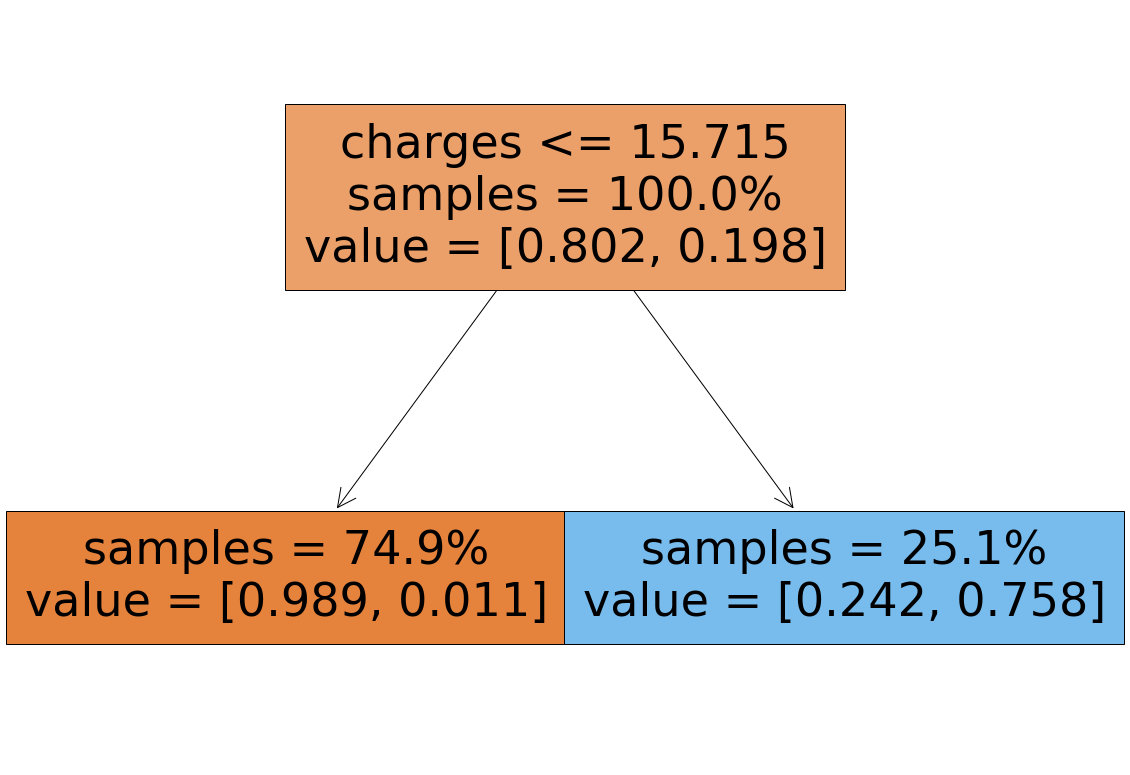

In [48]:
#Plotando a árvore:

from sklearn.tree import plot_tree

plt.figure(figsize=(20,14))
plot_tree(modelo, filled = True, proportion = True, impurity = False, feature_names=x.columns)
plt.show()

5.4) h = 4

In [49]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 4
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split=amostra_minima)
arvore = cross_validate(modelo, x, y, cv=validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('Precisão:', round(arvore['test_precision'].mean(), 4))

Acurácia: 0.9567
Sensibilidade: 0.9355
Precisão: 0.866


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


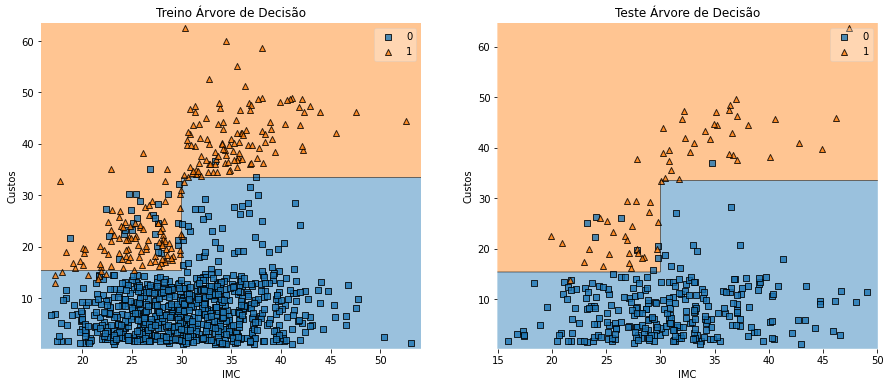

In [50]:
xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino Árvore de Decisão')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste Árvore de Decisão')

plt.show()

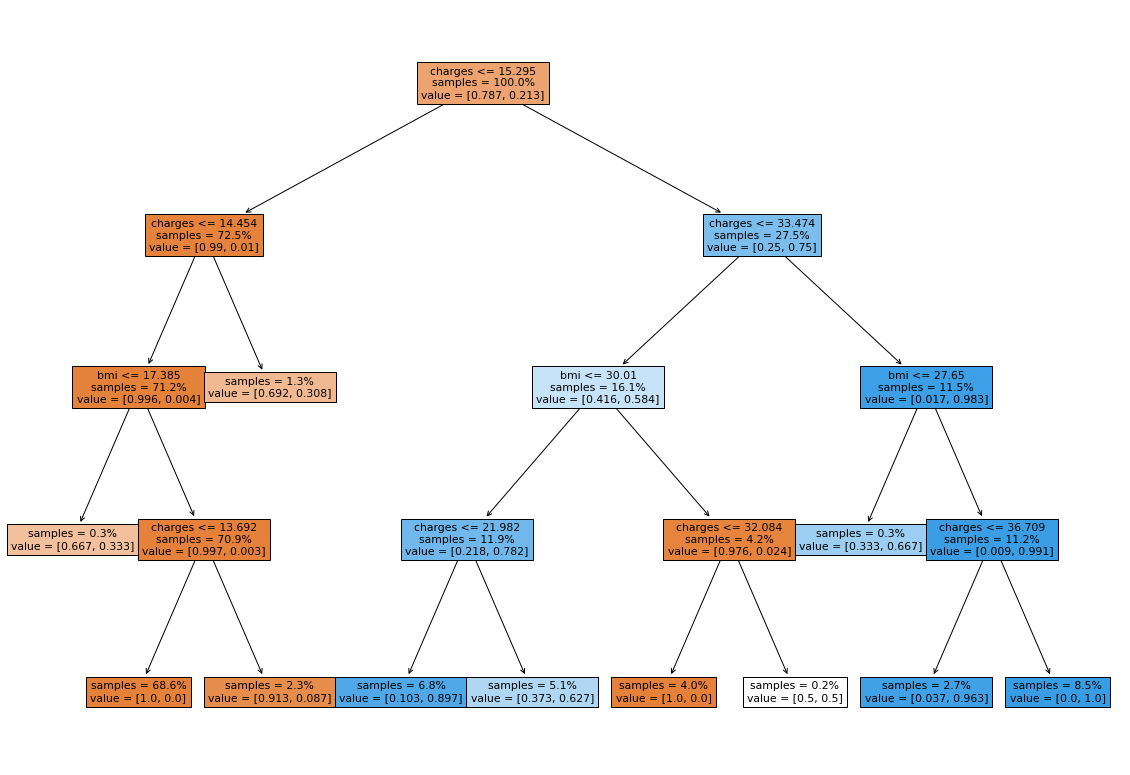

In [51]:
#Plotando a árvore:

from sklearn.tree import plot_tree

plt.figure(figsize=(20,14))
plot_tree(modelo, filled = True, proportion = True, impurity = False, feature_names=x.columns)
plt.show()

5.5) h=5

In [53]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 5
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split=amostra_minima)
arvore = cross_validate(modelo, x, y, cv=validacao, scoring = ['accuracy', 'recall', 'precision'])

print('Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('Precisão:', round(arvore['test_precision'].mean(), 4))

Acurácia: 0.9499
Sensibilidade: 0.8917
Precisão: 0.8659


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


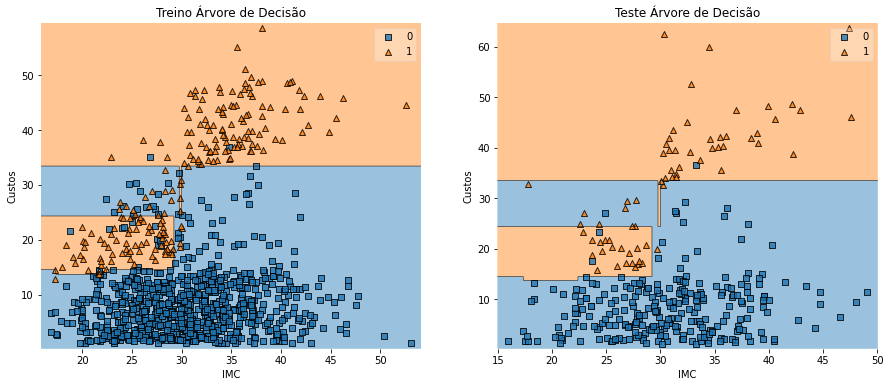

In [54]:
xtreino, xteste, ytreino, yteste = train_test_split(x,y,test_size = 0.25)
modelo.fit(xtreino, ytreino)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_decision_regions(xtreino.values, ytreino.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Treino Árvore de Decisão')

plt.subplot(1,2,2)
plot_decision_regions(xteste.values, yteste.values, clf=modelo, legend=1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Teste Árvore de Decisão')

plt.show()

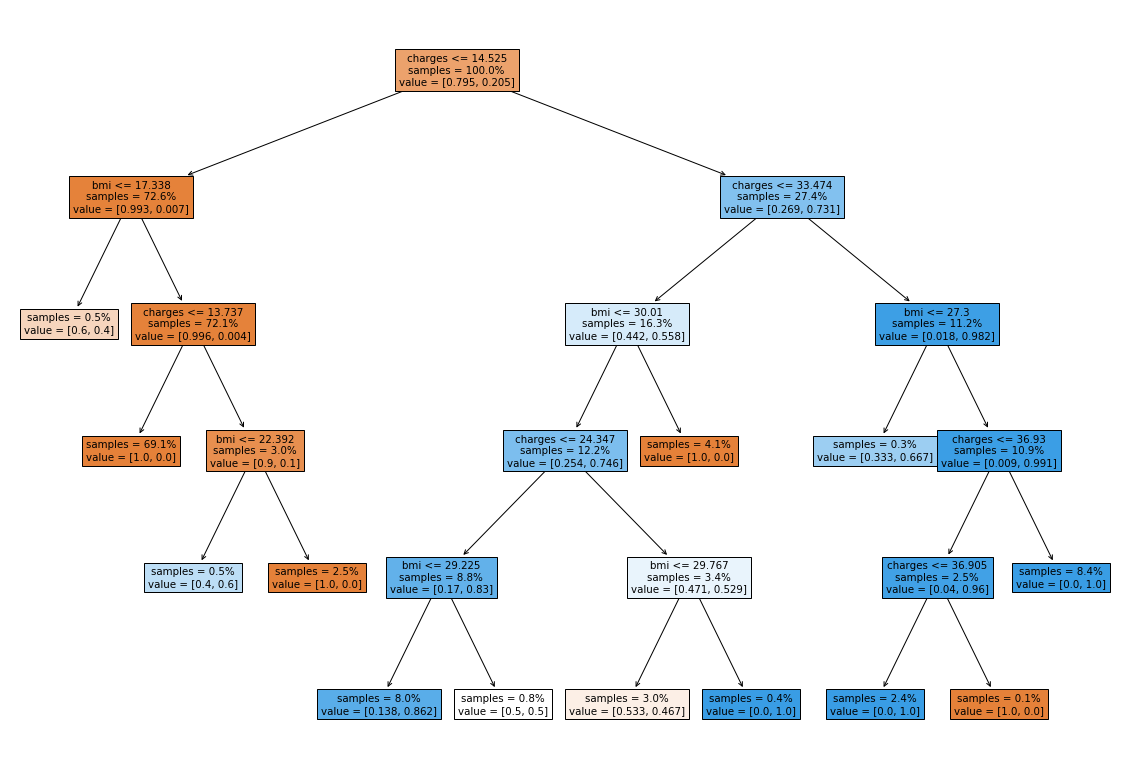

In [55]:
#Plotando a árvore:

from sklearn.tree import plot_tree

plt.figure(figsize=(20,14))
plot_tree(modelo, filled = True, proportion = True, impurity = False, feature_names=x.columns)
plt.show()

Analisando as métricas obtidas e os gráficos da região de decisão, nota-se que para h=5, a região de decisão obtida não separou os dados de fumantes e não fumantes de forma eficiente. Os melhores resultados obtidos foram para h =3.

# Comparação de Modelos via validação cruzada K-Fold

Aqui, o objetivo é analisar os resultados de acurácia, sensibilidade e precisão dos modelos KNN, com K=5,15,25,35 e 45, e Árvore de Decisão, com profundidade 1,2,3,4 e 5. 

In [52]:
modelos  =     [LogisticRegression(),
                KNeighborsClassifier (n_neighbors = 5),
                KNeighborsClassifier (n_neighbors = 15),
                KNeighborsClassifier (n_neighbors = 25),
                KNeighborsClassifier (n_neighbors = 35),
                KNeighborsClassifier (n_neighbors = 45),
                DecisionTreeClassifier (max_depth=1),
                DecisionTreeClassifier (max_depth=2),
                DecisionTreeClassifier (max_depth=3),
                DecisionTreeClassifier (max_depth=4),
                DecisionTreeClassifier (max_depth=5)]

nomes = ['Regressão Logística',
         'KNN - K = 5',
         'KNN - K = 15',
         'KNN - K = 25',
         'KNN - K = 35',
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']        

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, x, y, cv = validacao, scoring = ['accuracy','recall','precision'])
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acurácia':accs, 'Sensibilidade':sens, 'Precisão':vpps}    
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by='Acurácia', ascending = False).round(4)

,Acurácia,Sensibilidade,Precisão
Árvore - Prof = 3,0.9611,0.9631,0.8681
Árvore - Prof = 4,0.9611,0.9632,0.8581
KNN - K = 25,0.9604,0.9702,0.8597
KNN - K = 35,0.9596,0.9649,0.8516
KNN - K = 45,0.9589,0.9606,0.8568
KNN - K = 15,0.9574,0.9621,0.8499
Árvore - Prof = 5,0.9552,0.9179,0.8754
KNN - K = 5,0.9537,0.9194,0.8621
Regressão Logística,0.9335,0.8097,0.8567
Árvore - Prof = 1,0.9267,0.9608,0.7483


Os melhores resultados obtidos para acurácia foi no modelo de Árvore de Decisão para h=3 e 4. Os valores de sensibilidade e precisão foram bastante similares também. No modelo KNN, nota-se que os resultados mais satisfatórios foram para K mais elevados, pois há maior número de interações com os vizinhos, Entretanto, para K menores, a informação fica mais instável pela ausência de interações e, sendo assim, os resultados não são satisfatórios.